In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lendo o arquivo
df = pd.read_csv('weatherHistory.csv')

In [4]:
# Retirando os nulos
df['Precip Type'] = df['Precip Type'].fillna('null')

### 🔵 Atividades

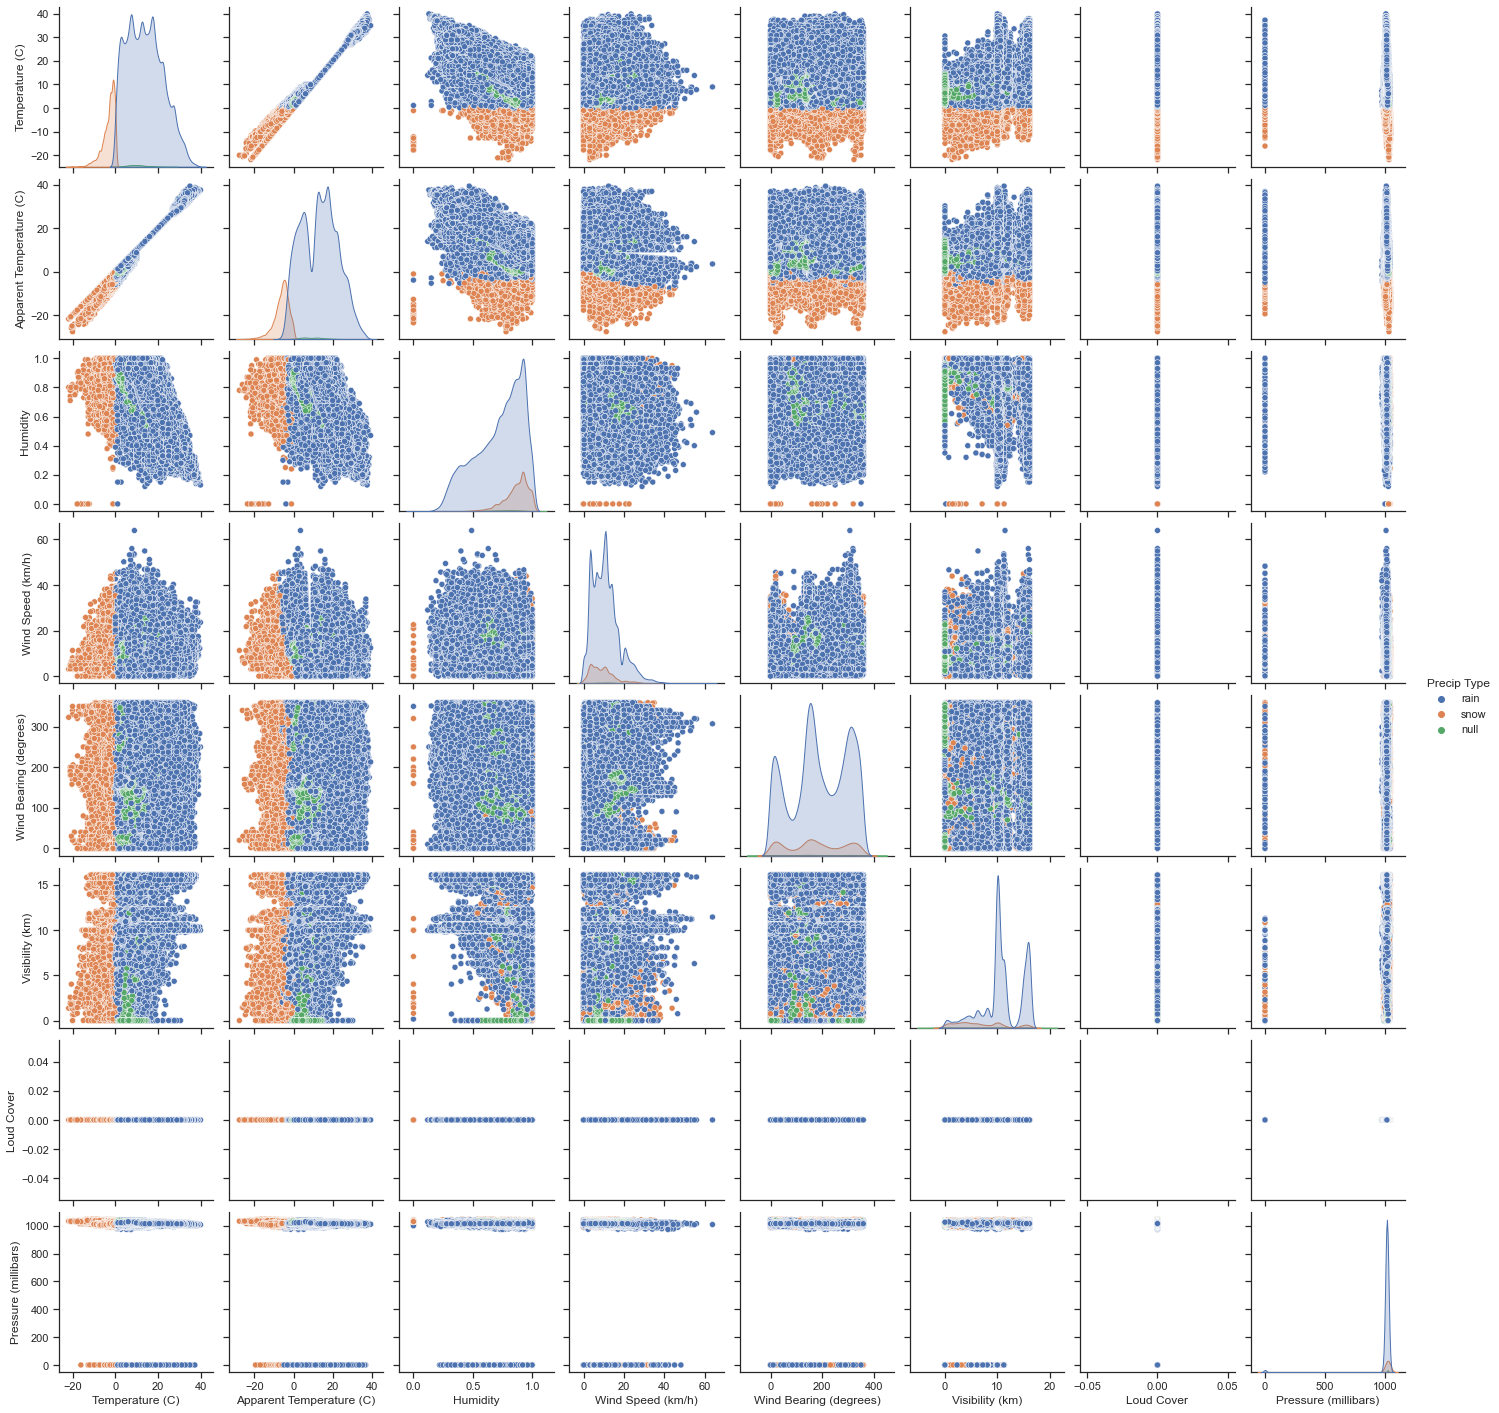

In [5]:
sns.set(style = 'ticks')
sns.pairplot(df, hue = 'Precip Type')
plt.show()

#### 🔵 a)

In [6]:
# Conjunto treinamento e testes
x_train, x_test, y_train, y_test = train_test_split(df[[u'Temperature (C)', u'Apparent Temperature (C)', 
                                                u'Humidity', u'Wind Speed (km/h)', u'Wind Bearing (degrees)', 
                                                u'Visibility (km)', u'Pressure (millibars)']],
                                                df[u'Precip Type'],
                                                test_size = 0.2, random_state=0)

In [7]:
# KNN - Acurácia
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Accuracy of KNN = {:.2f}%".format(100 * np.sum(knn.predict(x_test) == y_test)/len(y_test)))

print('\n')

# KNN - Precisão e Revocação
y_pred_class = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred_class))

Accuracy of KNN = 97.69%


              precision    recall  f1-score   support

        null       0.69      0.24      0.36       111
        rain       0.98      0.99      0.99     17082
        snow       0.92      0.91      0.92      2098

    accuracy                           0.98     19291
   macro avg       0.87      0.71      0.75     19291
weighted avg       0.98      0.98      0.98     19291



In [8]:
# SVM - Acurácia
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)
print("Accuracy of SVM = {:.2f}%".format(100 * np.sum(svm.predict(x_test) == y_test)/len(y_test)))

print('\n')

# SVM - Precisão e Revocação
y_pred_class = svm.predict(x_test)
print(metrics.classification_report(y_test, y_pred_class))

Accuracy of SVM = 99.33%


              precision    recall  f1-score   support

        null       0.00      0.00      0.00       111
        rain       0.99      1.00      1.00     17082
        snow       0.99      1.00      1.00      2098

    accuracy                           0.99     19291
   macro avg       0.66      0.67      0.66     19291
weighted avg       0.99      0.99      0.99     19291



In [10]:
# Árvore de Decisão - Acurácia
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)
print("Accuracy of decision tree: {:.2f}%".format(100*np.sum(decision_tree.predict(x_test) == y_test)/len(y_test)))

print('\n')

# Árvore de Decisão - Precisão e Revocação
y_pred_class = decision_tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred_class))

Accuracy of decision tree: 99.41%


              precision    recall  f1-score   support

        null       0.49      0.43      0.46       111
        rain       1.00      1.00      1.00     17082
        snow       1.00      1.00      1.00      2098

    accuracy                           0.99     19291
   macro avg       0.83      0.81      0.82     19291
weighted avg       0.99      0.99      0.99     19291



#### 🔵 b)

In [12]:
# Conjunto treinamento e testes
# Desta vez não utilizaremos todos os atributos
x_train, x_test, y_train, y_test = train_test_split(df[[u'Temperature (C)', u'Apparent Temperature (C)', 
                                                u'Humidity', u'Wind Speed (km/h)']],
                                                df[u'Precip Type'],
                                                test_size = 0.2, random_state = 0)

In [13]:
# KNN - Acurácia
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Accuracy of KNN = {:.2f}%".format(100 * np.sum(knn.predict(x_test) == y_test)/len(y_test)))

Accuracy of KNN = 99.21%


In [15]:
# SVM - Acurácia
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)
print("Accuracy of SVM = {:.2f}%".format(100*np.sum(svm.predict(x_test) == y_test)/len(y_test)))

AttributeError: 'SVC' object has no attribute 'SVC'

##### Não entendi o erro que aconteceu acima :/

In [16]:
# Tree - Acurácia
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)
print("Accuracy of decision tree: {:.2f}%".format(100*np.sum(decision_tree.predict(x_test) == y_test)/len(y_test)))

Accuracy of decision tree: 99.00%


#### 🔵 c)
**SVM** foi o mais lento, enquanto que a **árvore de Decisão** foi o mais rápido em execução.

#### 🔵 d)

In [17]:
# Conjunto treinamento e testes
xTrain, xTest, yTrain, yTest = train_test_split(df[[u'Temperature (C)', u'Apparent Temperature (C)', 
                                                u'Humidity', u'Wind Speed (km/h)', u'Wind Bearing (degrees)', 
                                                u'Visibility (km)', u'Pressure (millibars)']],
                                                df[u'Precip Type'],
                                                test_size = 0.2, random_state = 0)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<AxesSubplot:>

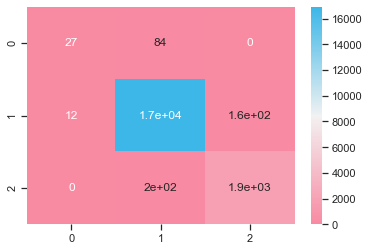

In [24]:
# Matriz para o KNN
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
matriz = confusion_matrix(yTest, knn.predict(xTest))

# color map
cmap = sns.diverging_palette(0, 230, 90, 70, as_cmap=True)

# plot heatmap
sns.heatmap(matriz, annot=True, cmap=cmap)

In [25]:
# Matriz para o SVM
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(xTrain, yTrain)
matriz = confusion_matrix(yTest, svm.predict(xTest))

# color map
cmap = sns.diverging_palette(0, 230, 90, 70, as_cmap=True)

# plot heatmap
sns.heatmap(matriz, annot=True, cmap=cmap)

AttributeError: 'SVC' object has no attribute 'SVC'

<AxesSubplot:>

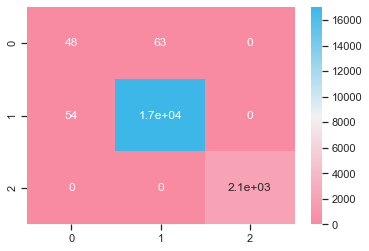

In [27]:
# Matriz para a árvore
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(xTrain, yTrain)
matriz = confusion_matrix(yTest, decisionTree.predict(xTest))

# color map
cmap = sns.diverging_palette(0, 230, 90, 70, as_cmap=True)

# plot heatmap
sns.heatmap(matriz, annot=True, cmap=cmap)